In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('students_adaptability.xlsx')

# Data Understanding and Goals


## Data understanding

In [6]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


### Kolom
- Gender: Jenis kelamin siswa
- Age: Umur siswa
- Education Level: Tingkatan edukasi(school/university/dll)
- Institution type: (government/non-government)
- IT student: Apakah siswa merupakan siswa dari jurusan IT? (information technology)
- Location: Apakah siswa tinggal di daerah perkotaan?
- Load-shedding: Tingkat pemadaman bergilir di daerah tinggal siswa
- Financial condition: Kondisi ekonomi keluarga siswa
- Internet type: (mobile data/wifi)
- Network type: Tipe koneksi (4G/3G/dll)
- Class duration: Durasi kelas per-harinya
- Self Lms: Apakah institusi akademisnya memiliki LMS tersendiri?
- Device: Perangkat yang digunakan untuk mengikuti kelas
- Adaptability level: Tingkat adaptasi

## Goals
1. Mengetahui apakah keberadaan LMS sudah efektif membantu siswa dalam beradaptasi di sistem pembelajaran online
2. Mengetahui Pengaruh faktor demografis terhadap adaptasi siswa
3. Mengetahui class duration yang optimal untuk diterapkan berdasarkan faktor demografis yang perlu atensi lebih


# Data Cleaning
Data tidak memiliki kolom dengan null values, sehingga tidak perlu di drop ataupun diganti dengan nilai lainnya. Oleh karena itu, langsung dilanjutkan ke pembersihan outlier

## Mengidentifikasi dan memangkas outlier

In [8]:
for col in df.columns:
    print(f"\nDistribusi {col}:")
    print(df[col].value_counts())



Distribusi Gender:
Gender
Boy     663
Girl    542
Name: count, dtype: int64

Distribusi Age:
Age
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: count, dtype: int64

Distribusi Education Level:
Education Level
School        530
University    456
College       219
Name: count, dtype: int64

Distribusi Institution Type:
Institution Type
Non Government    823
Government        382
Name: count, dtype: int64

Distribusi IT Student:
IT Student
No     901
Yes    304
Name: count, dtype: int64

Distribusi Location:
Location
Yes    935
No     270
Name: count, dtype: int64

Distribusi Load-shedding:
Load-shedding
Low     1004
High     201
Name: count, dtype: int64

Distribusi Financial Condition:
Financial Condition
Mid     878
Poor    242
Rich     85
Name: count, dtype: int64

Distribusi Internet Type:
Internet Type
Mobile Data    695
Wifi           510
Name: count, dtype: int64

Distribusi Network Type:
Network Type
4G    775
3G    411
2G     19
Name: count,

In [9]:
print(df[['Age', 'Education Level']].value_counts())

Age    Education Level
11-15  School             353
21-25  University         352
16-20  College            197
1-5    School              81
26-30  University          68
6-10   School              51
16-20  School              45
       University          36
21-25  College             22
Name: count, dtype: int64


umur dan jenjang pendidikan masih masuk akal (contoh: tidak ada siswa di rentang umur 26-30 yang masih sekolah)

### Jenis data suspicious
- Class Duration: 0 -> bisa karena salah input atau memang tidak termasuk ke murid yang mengikuti pembelajaran online. Sebaiknya di-drop karena tidak relevan
- Network Type: 2G -> konteks datanya terakhir diupdate 3 tahun lalu dan kemungkinan diambil dari India, hal ini masih wajar-wajar saja tetapi lebih baik digabungkan dengan data 3G menjadi kategori "Low Network"

In [10]:
# Drop Data Class Duration 0
df = df[df['Class Duration'] != "0"]
print(df['Class Duration'].value_counts())

Class Duration
1-3    840
3-6    211
Name: count, dtype: int64


In [11]:
# Kategorikan Network Type
df = df.replace({
    'Network Type': {
        '2G': 'Low Network',
        '3G': 'Low Network',
        '4G': 'High Network'
    }
})

print(df['Network Type'].value_counts())

Network Type
High Network    666
Low Network     385
Name: count, dtype: int64


# Data Manipulation

In [82]:
# Kategorisasi umur
age_map = {
    "1-5": "Children",
    "6-10": "Children",
    "11-15": "Teenager",
    "16-20": "Teenager",
    "21-25": "Young Adult",
    "26-30": "Young Adult"
}

df["Age Group"] = df["Age"].map(age_map)

print(df[["Age", "Age Group"]].drop_duplicates().sort_values("Age Group"))


      Age    Age Group
20   6-10     Children
26    1-5     Children
2   16-20     Teenager
3   11-15     Teenager
0   21-25  Young Adult
27  26-30  Young Adult


# EDA

## Mengetahui apakah keberadaan LMS sudah efektif membantu siswa dalam beradaptasi di sistem pembelajaran online

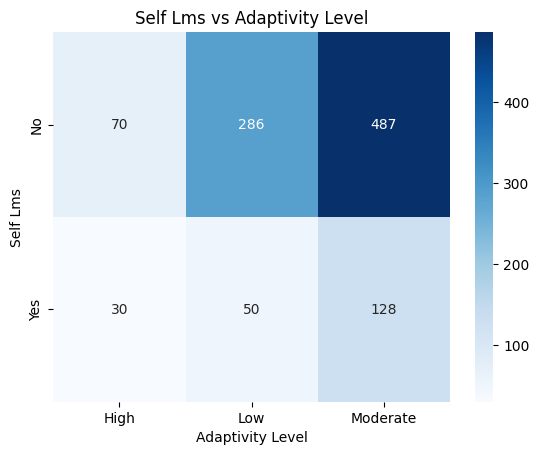

In [13]:
# Heatmap
ct = pd.crosstab(df['Self Lms'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Self Lms vs Adaptivity Level")
plt.show()

In [14]:
ct = pd.crosstab(df['Self Lms'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
Self Lms,,,
No,70,286,487
Yes,30,50,128


In [15]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level  High   Low  Moderate
Self Lms                              
No                 8.3  33.9      57.8
Yes               14.4  24.0      61.5


In [16]:
# Chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("Ada hubungan signifikan antara LMS dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara LMS dan Adaptivity Level")

Chi2: 12.073361621446912
p-value: 0.0023894768917891523
Degrees of freedom: 2
Ada hubungan signifikan antara LMS dan Adaptivity Level


### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan diantara LMS dan Adaptivity Level. Apabila kita melihat proporsi crosstab:
- Low adaptivity: proporsi lebih banyak tersebar di siswa yang institusinya tidak memiliki lms
- Moderate adaptivity: proporsi lebih banyak tersebar di siswa yang institusinya memiliki lms
- High adaptivity: proporsi lebih banyak tersebar di siswa yang institusinya memiliki lms

## Mengetahui Pengaruh faktor demografis terhadap adaptasi siswa

### IT vs Non-IT

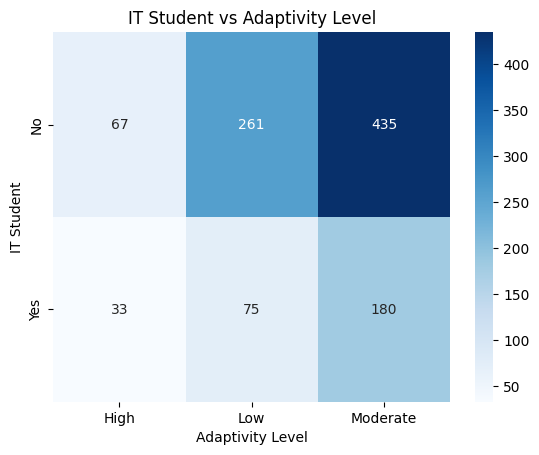

In [17]:
ct = pd.crosstab(df['IT Student'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("IT Student vs Adaptivity Level")
plt.show()

In [18]:
ct = pd.crosstab(df['IT Student'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
IT Student,,,
No,67,261,435
Yes,33,75,180


In [19]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level  High   Low  Moderate
IT Student                            
No                 8.8  34.2      57.0
Yes               11.5  26.0      62.5


In [20]:
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara IT Student dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara IT Student dan Adaptivity Level")

Chi2: 7.011699020715078
p-value: 0.030021259137832313
Ada hubungan signifikan antara IT Student dan Adaptivity Level


#### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan antara status siswa IT dan Adaptivity Level. Apabila kita melihat proporsi crosstab:

- Low adaptivity: proporsi lebih banyak tersebar di siswa non-IT

- Moderate adaptivity: proporsi lebih banyak tersebar di siswa IT

- High adaptivity: proporsi relatif seimbang, sedikit lebih tinggi pada siswa non-IT

Hal ini dapat menandakan bahwa siswa IT cenderung lebih mudah menyesuaikan diri dengan sistem pembelajaran online pada level adaptasi moderat

### Age group

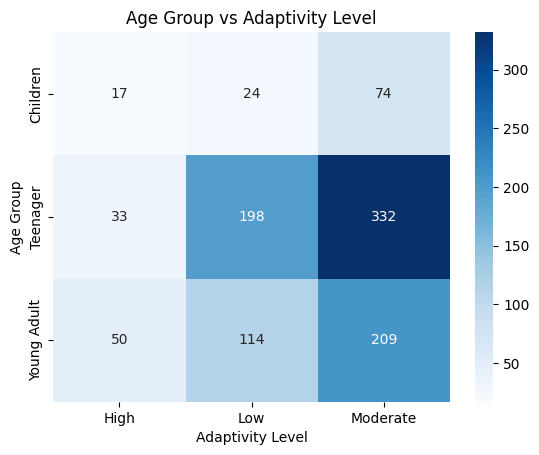

In [21]:
ct = pd.crosstab(df['Age Group'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Age Group vs Adaptivity Level")
plt.show()


In [22]:
ct = pd.crosstab(df['Age Group'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
Age Group,,,
Children,17,24,74
Teenager,33,198,332
Young Adult,50,114,209


In [23]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level  High   Low  Moderate
Age Group                             
Children          14.8  20.9      64.3
Teenager           5.9  35.2      59.0
Young Adult       13.4  30.6      56.0


In [24]:
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara Age Group dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara Age Group dan Adaptivity Level")

Chi2: 24.730496748544383
p-value: 5.6992524895124225e-05
Ada hubungan signifikan antara Age Group dan Adaptivity Level


#### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan antara Age Group dan Adaptivity Level. Apabila kita melihat proporsi crosstab:

- Low adaptivity: proporsi lebih banyak tersebar pada Teenager

- Moderate adaptivity: proporsi relatif seimbang, sedikit lebih tinggi pada Children

- High adaptivity: proporsi lebih banyak tersebar pada Children dan Young Adult

Berdasarkan proporsi ini, kategori usia Children menunjukkan tingkat adaptasi tertinggi, diikuti oleh Young Adult, sedangkan Teenager cenderung mengalami adaptasi lebih rendah.

### Education Level

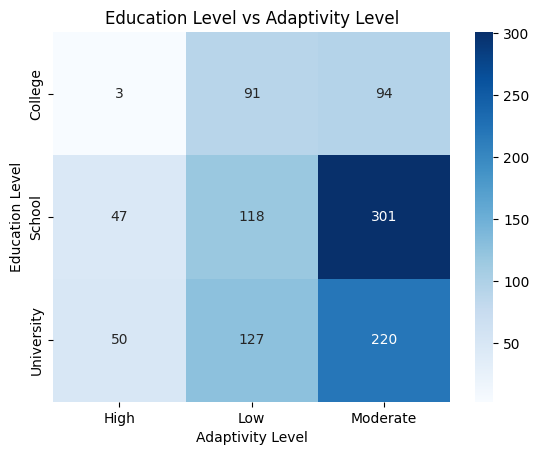

In [25]:
ct = pd.crosstab(df['Education Level'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Education Level vs Adaptivity Level")
plt.show()

In [26]:
ct = pd.crosstab(df['Education Level'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
Education Level,,,
College,3,91,94
School,47,118,301
University,50,127,220


In [27]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level  High   Low  Moderate
Education Level                       
College            1.6  48.4      50.0
School            10.1  25.3      64.6
University        12.6  32.0      55.4


In [28]:
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara Education Level dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara Education Level dan Adaptivity Level")

Chi2: 44.75547417585525
p-value: 4.46966254286381e-09
Ada hubungan signifikan antara Education Level dan Adaptivity Level


#### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan antara Education Level dan Adaptivity Level. Apabila kita melihat proporsi crosstab:

- Low adaptivity: proporsi lebih banyak tersebar pada College student

- Moderate adaptivity: proporsi relatif seimbang, sedikit lebih tinggi pada School student

- High adaptivity: proporsi lebih banyak tersebar pada University student

Berdasarkan proporsi ini, kategori pendidikan University menunjukkan tingkat adaptasi tertinggi, diikuti oleh School, sedangkan College cenderung mengalami adaptasi lebih rendah.

### Gender

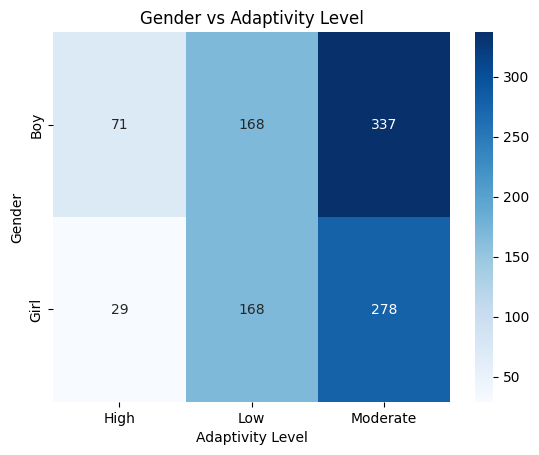

In [29]:
ct = pd.crosstab(df['Gender'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Gender vs Adaptivity Level")
plt.show()

In [30]:
ct = pd.crosstab(df['Gender'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
Gender,,,
Boy,71,168,337
Girl,29,168,278


In [31]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level  High   Low  Moderate
Gender                                
Boy               12.3  29.2      58.5
Girl               6.1  35.4      58.5


In [32]:
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara Gender dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara Gender dan Adaptivity Level")

Chi2: 13.720880765642088
p-value: 0.001048452110647803
Ada hubungan signifikan antara Gender dan Adaptivity Level


#### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan antara gender dan Adaptivity Level. Apabila kita melihat proporsi crosstab:

- Low adaptivity: proporsi lebih banyak tersebar pada perempuan

- Moderate adaptivity: tersebar secara merata di kedua gender

- High adaptivity: proporsi lebih banyak tersebar pada lelaki

Berdasarkan proporsi ini, lelaki lebih mudah beradaptasi dalam sistem pembelajaran online dibandingkan perempuan

### Location

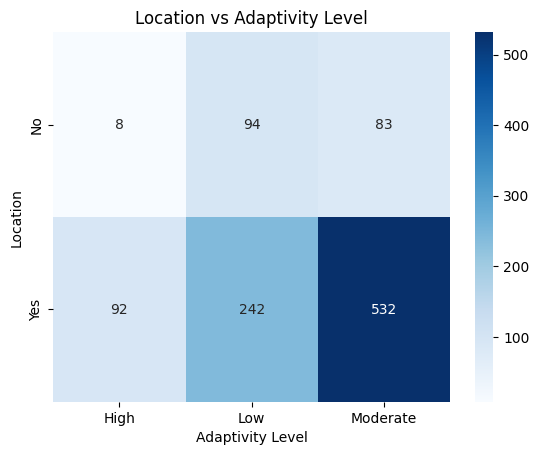

In [33]:
ct = pd.crosstab(df['Location'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Location vs Adaptivity Level")
plt.show()

In [34]:
ct = pd.crosstab(df['Location'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
Location,,,
No,8,94,83
Yes,92,242,532


In [35]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level  High   Low  Moderate
Location                              
No                 4.3  50.8      44.9
Yes               10.6  27.9      61.4


In [36]:
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara Location dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara Location dan Adaptivity Level")

Chi2: 38.43813268089407
p-value: 4.500549482299098e-09
Ada hubungan signifikan antara Location dan Adaptivity Level


#### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan antara gender dan Adaptivity Level. Apabila kita melihat proporsi crosstab:

- Low adaptivity: proporsi lebih banyak tersebar pada murid yang tidak tinggal di kota

- Moderate adaptivity: proporsi lebih banyak tersebar pada murid yang tinggal di kota

- High adaptivity: proporsi lebih banyak tersebar pada murid yang tinggal di kota

Berdasarkan proporsi ini, murid yang tinggal di daerah perkotaan lebih adaptif daripada murid yang tidak tinggal di perkotaan.

### Financial condition

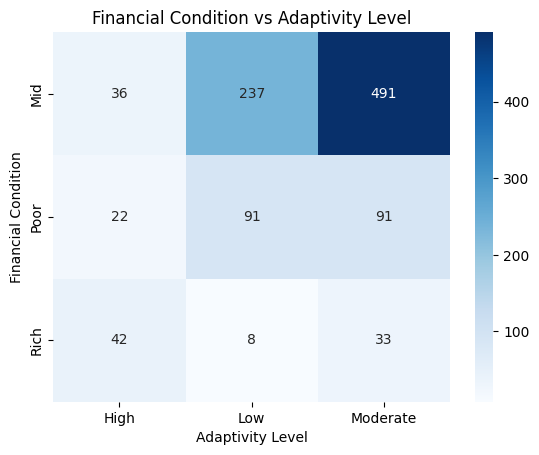

In [37]:
ct = pd.crosstab(df['Financial Condition'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Financial Condition vs Adaptivity Level")
plt.show()

In [38]:
ct = pd.crosstab(df['Financial Condition'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
Financial Condition,,,
Mid,36,237,491
Poor,22,91,91
Rich,42,8,33


In [39]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level     High   Low  Moderate
Financial Condition                      
Mid                   4.7  31.0      64.3
Poor                 10.8  44.6      44.6
Rich                 50.6   9.6      39.8


In [40]:
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara Financial Condition dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara Financial Condition dan Adaptivity Level")

Chi2: 205.53939157079265
p-value: 2.41968458122421e-43
Ada hubungan signifikan antara Financial Condition dan Adaptivity Level


#### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan antara Financial Condition dan Adaptivity Level. Apabila kita melihat proporsi crosstab:

- Low adaptivity: proporsi lebih banyak tersebar pada murid dengan ekonomi Poor

- Moderate adaptivity: proporsi lebih banyak tersebar pada murid dengan ekonomi Mid

- High adaptivity: proporsi lebih banyak tersebar pada murid dengan ekonomi Rich

Berdasarkan proporsi ini, semakin tinggi tingkat financial conditionnya, semakin baik tingkat adaptivitasnya terhadap pembelajaran online

## Kesimpulan akhir
Kategori murid berdasarkan demografis yang perlu lebih diperhatikan:
- Teenager
- College student
- Perempuan
- Tinggal di luar kota
- Memiliki financial condition yang kurang baik

## Mengetahui kategori class duration yang optimal untuk diterapkan bagi berbagai jenis demografis

### Uji statistik untuk menemukan apakah terdapat korelasi antara class duration dengan adaptivity level

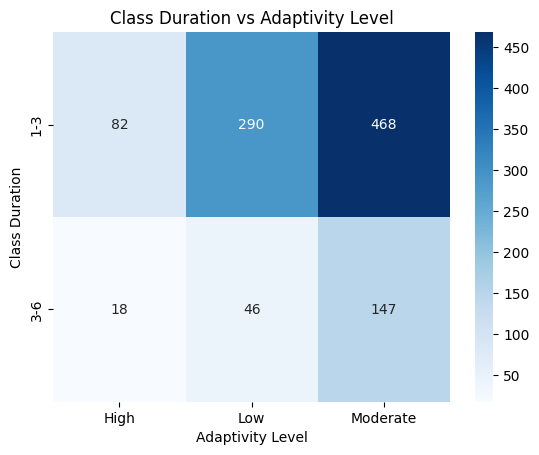

In [41]:
ct = pd.crosstab(df['Class Duration'], df['Adaptivity Level'])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Class Duration vs Adaptivity Level")
plt.show()


In [42]:
ct = pd.crosstab(df['Class Duration'], df['Adaptivity Level'])
ct

Adaptivity Level,High,Low,Moderate
Class Duration,,,
1-3,82,290,468
3-6,18,46,147


In [43]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(1)  # bulatkan 1 desimal

print("\nCrosstab (persentase per baris):")
print(ct_percent)


Crosstab (persentase per baris):
Adaptivity Level  High   Low  Moderate
Class Duration                        
1-3                9.8  34.5      55.7
3-6                8.5  21.8      69.7


In [44]:
chi2, p, dof, ex = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Ada hubungan signifikan antara Class Duration dan Adaptivity Level")
else:
    print("Tidak ada hubungan signifikan antara Class Duration dan Adaptivity Level")

Chi2: 14.41886633562607
p-value: 0.0007395762522973278
Ada hubungan signifikan antara Class Duration dan Adaptivity Level


#### Kesimpulan
Uji statistik menyatakan bahwa terdapat hubungan antara Class Duration dan Adaptivity Level. Apabila kita melihat proporsi crosstab:

- Low adaptivity: proporsi lebih banyak tersebar di siswa dengan durasi kelas 1-3 jam

- Moderate adaptivity: proporsi lebih banyak tersebar di siswa dengan durasi kelas 3-6 jam

- High adaptivity: proporsi relatif seimbang, sedikit lebih tinggi pada durasi kelas 1-3 jam


Lalu mengapa durasi 1-3 jam berada di low adaptivity dan high adaptivity sekaligus?

### Age Group

In [45]:
# Crosstab proporsi
ct = pd.crosstab(
    [df["Age Group"], df["Class Duration"]],
    df["Adaptivity Level"],
    normalize="index"
)

# Filter hanya untuk Age Group = Teenager
ct_target = ct.loc["Teenager"]

print(ct_target)


Adaptivity Level      High       Low  Moderate
Class Duration                                
1-3               0.059172  0.374753  0.566075
3-6               0.053571  0.142857  0.803571


In [46]:
ct_percent = (ct_target * 100).round(2)
ct_percent

Adaptivity Level,High,Low,Moderate
Class Duration,,,
1-3,5.92,37.48,56.61
3-6,5.36,14.29,80.36


In [47]:
ct_target = ct_target.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate
0,1-3,0.059172,0.374753,0.566075
1,3-6,0.053571,0.142857,0.803571


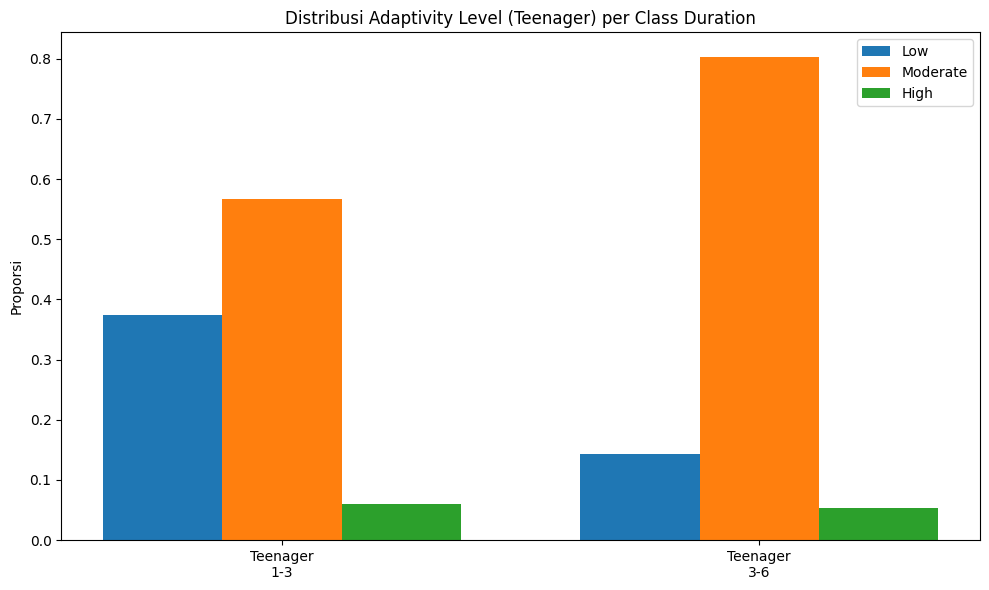

In [48]:
ct_target = ct.loc["Teenager"].reset_index()
ct_target["Group_Duration"] = "Teenager\n" + ct_target["Class Duration"]

x = np.arange(len(ct_target["Group_Duration"]))  # posisi group
width = 0.25  # lebar tiap bar

fig, ax = plt.subplots(figsize=(10,6))

# Plot Low, Moderate, High berdampingan
ax.bar(x - width, ct_target["Low"], width, label="Low")
ax.bar(x,         ct_target["Moderate"], width, label="Moderate")
ax.bar(x + width, ct_target["High"], width, label="High")

ax.set_xticks(x)
ax.set_xticklabels(ct_target["Group_Duration"], rotation=0)
ax.set_ylabel("Proporsi")
ax.set_title("Distribusi Adaptivity Level (Teenager) per Class Duration")
ax.legend()

plt.tight_layout()
plt.show()

#### Membuat weighted score

In [49]:
weights = {"High": 2, "Moderate": 1, "Low": 0.5}
ct_target["Effectiveness Score"] = (
    ct_target["High"] * weights["High"] +
    ct_target["Moderate"] * weights["Moderate"] +
    ct_target["Low"] * weights["Low"]
)
# ct_score = ct.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate,Group_Duration,Effectiveness Score
0,1-3,0.059172,0.374753,0.566075,Teenager\n1-3,0.871795
1,3-6,0.053571,0.142857,0.803571,Teenager\n3-6,0.982143


In [50]:
ct_score = ct_target.reset_index()

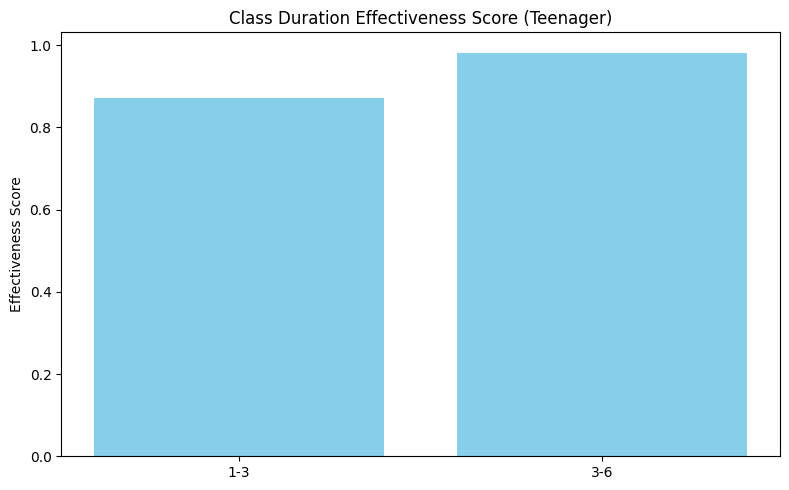

In [51]:
ct_score["Effectiveness Score"] = (
    ct_score["High"] * weights["High"] +
    ct_score["Moderate"] * weights["Moderate"] +
    ct_score["Low"] * weights["Low"]
)

# Label pakai Class Duration saja
ct_score["Group_Duration"] = ct_score["Class Duration"]

# Posisi sumbu X
x = np.arange(len(ct_score))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(x, ct_score["Effectiveness Score"], color="skyblue")

plt.xticks(x, ct_score["Group_Duration"], rotation=0)
plt.ylabel("Effectiveness Score")
plt.title("Class Duration Effectiveness Score (Teenager)")
plt.tight_layout()
plt.show()

#### Kesimpulan
Teenager lebih bisa beradaptasi secara efektif di class duration 3-6 jam perhari


### Education Level

In [52]:
# Crosstab proporsi
ct = pd.crosstab(
    [df["Education Level"], df["Class Duration"]],
    df["Adaptivity Level"],
    normalize="index"
)

# Filter hanya untuk Ed Level = College
ct_target = ct.loc["College"]

print(ct_target)


Adaptivity Level      High       Low  Moderate
Class Duration                                
1-3               0.000000  0.566667  0.433333
3-6               0.078947  0.157895  0.763158


In [53]:
ct_percent = (ct_target * 100).round(2)
ct_percent

Adaptivity Level,High,Low,Moderate
Class Duration,,,
1-3,0.00,56.67,43.33
3-6,7.89,15.79,76.32


In [54]:
ct_target = ct_target.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate
0,1-3,0.000000,0.566667,0.433333
1,3-6,0.078947,0.157895,0.763158


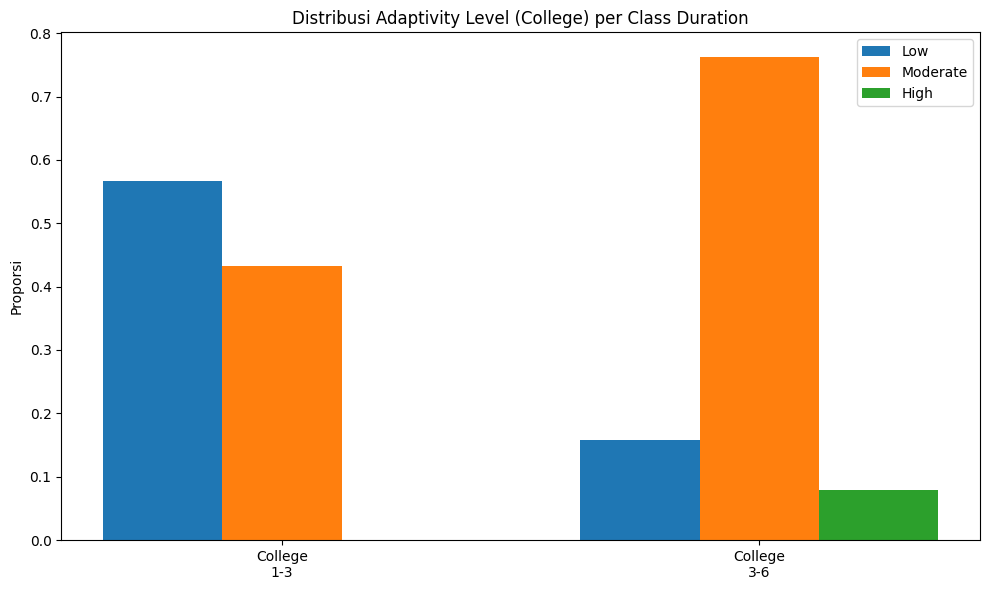

In [55]:
ct_target = ct.loc["College"].reset_index()
ct_target["Group_Duration"] = "College\n" + ct_target["Class Duration"]

x = np.arange(len(ct_target["Group_Duration"]))  # posisi group
width = 0.25  # lebar tiap bar

fig, ax = plt.subplots(figsize=(10,6))

# Plot Low, Moderate, High berdampingan
ax.bar(x - width, ct_target["Low"], width, label="Low")
ax.bar(x,         ct_target["Moderate"], width, label="Moderate")
ax.bar(x + width, ct_target["High"], width, label="High")

ax.set_xticks(x)
ax.set_xticklabels(ct_target["Group_Duration"], rotation=0)
ax.set_ylabel("Proporsi")
ax.set_title("Distribusi Adaptivity Level (College) per Class Duration")
ax.legend()

plt.tight_layout()
plt.show()

#### Membuat weighted score

In [56]:
weights = {"High": 2, "Moderate": 1, "Low": 0.5}
ct_target["Effectiveness Score"] = (
    ct_target["High"] * weights["High"] +
    ct_target["Moderate"] * weights["Moderate"] +
    ct_target["Low"] * weights["Low"]
)
# ct_score = ct.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate,Group_Duration,Effectiveness Score
0,1-3,0.000000,0.566667,0.433333,College\n1-3,0.716667
1,3-6,0.078947,0.157895,0.763158,College\n3-6,1.000000


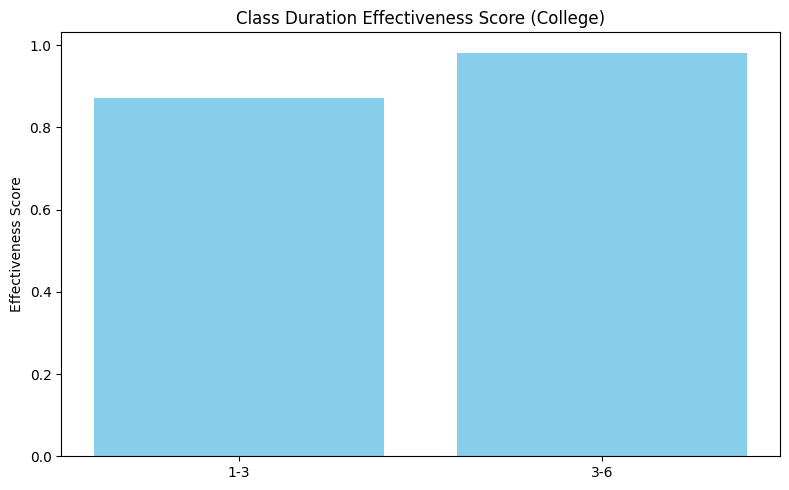

In [57]:
ct_score["Effectiveness Score"] = (
    ct_score["High"] * weights["High"] +
    ct_score["Moderate"] * weights["Moderate"] +
    ct_score["Low"] * weights["Low"]
)

# Label pakai Class Duration saja
ct_score["Group_Duration"] = ct_score["Class Duration"]

# Posisi sumbu X
x = np.arange(len(ct_score))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(x, ct_score["Effectiveness Score"], color="skyblue")

plt.xticks(x, ct_score["Group_Duration"], rotation=0)
plt.ylabel("Effectiveness Score")
plt.title("Class Duration Effectiveness Score (College)")
plt.tight_layout()
plt.show()

#### Kesimpulan
College Student lebih bisa beradaptasi secara efektif di class duration 3-6 jam perhari


### Gender

In [58]:
# Crosstab proporsi
ct = pd.crosstab(
    [df["Gender"], df["Class Duration"]],
    df["Adaptivity Level"],
    normalize="index"
)

# Filter hanya untuk Gender = Girl
ct_target = ct.loc["Girl"]

print(ct_target)


Adaptivity Level      High       Low  Moderate
Class Duration                                
1-3               0.058376  0.390863  0.550761
3-6               0.074074  0.172840  0.753086


In [59]:
ct_percent = (ct_target * 100).round(2)
ct_percent

Adaptivity Level,High,Low,Moderate
Class Duration,,,
1-3,5.84,39.09,55.08
3-6,7.41,17.28,75.31


In [60]:
ct_target = ct_target.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate
0,1-3,0.058376,0.390863,0.550761
1,3-6,0.074074,0.172840,0.753086


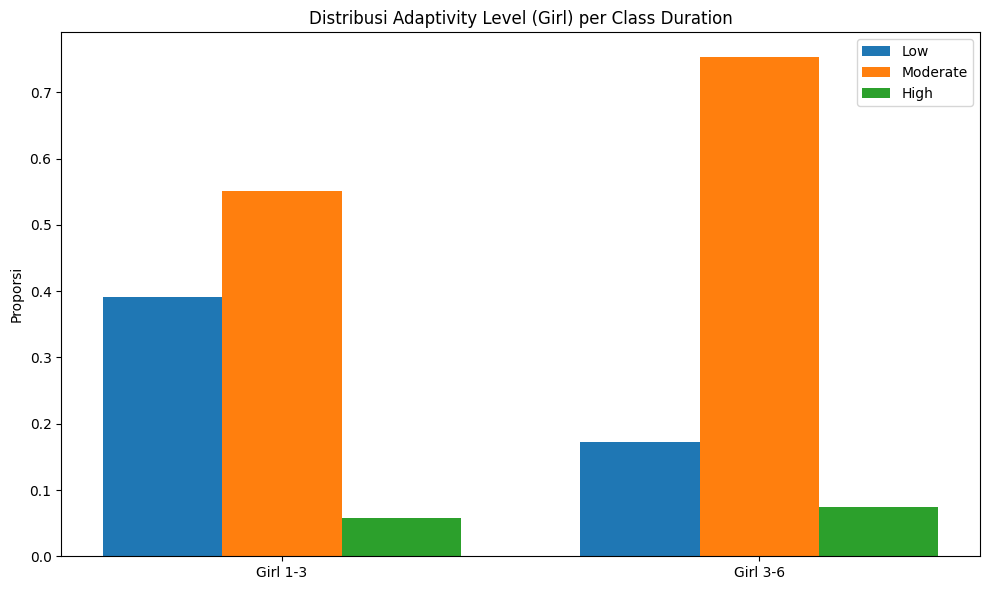

In [61]:
ct_target = ct.loc["Girl"].reset_index()
ct_target["Group_Duration"] = "Girl " + ct_target["Class Duration"]

x = np.arange(len(ct_target["Group_Duration"]))  # posisi group
width = 0.25  # lebar tiap bar

fig, ax = plt.subplots(figsize=(10,6))

# Plot Low, Moderate, High berdampingan
ax.bar(x - width, ct_target["Low"], width, label="Low")
ax.bar(x,         ct_target["Moderate"], width, label="Moderate")
ax.bar(x + width, ct_target["High"], width, label="High")

ax.set_xticks(x)
ax.set_xticklabels(ct_target["Group_Duration"], rotation=0)
ax.set_ylabel("Proporsi")
ax.set_title("Distribusi Adaptivity Level (Girl) per Class Duration")
ax.legend()

plt.tight_layout()
plt.show()

#### Membuat weighted score

In [62]:
weights = {"High": 2, "Moderate": 1, "Low": 0.5}
ct_target["Effectiveness Score"] = (
    ct_target["High"] * weights["High"] +
    ct_target["Moderate"] * weights["Moderate"] +
    ct_target["Low"] * weights["Low"]
)
# ct_score = ct.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate,Group_Duration,Effectiveness Score
0,1-3,0.058376,0.390863,0.550761,Girl 1-3,0.862944
1,3-6,0.074074,0.172840,0.753086,Girl 3-6,0.987654


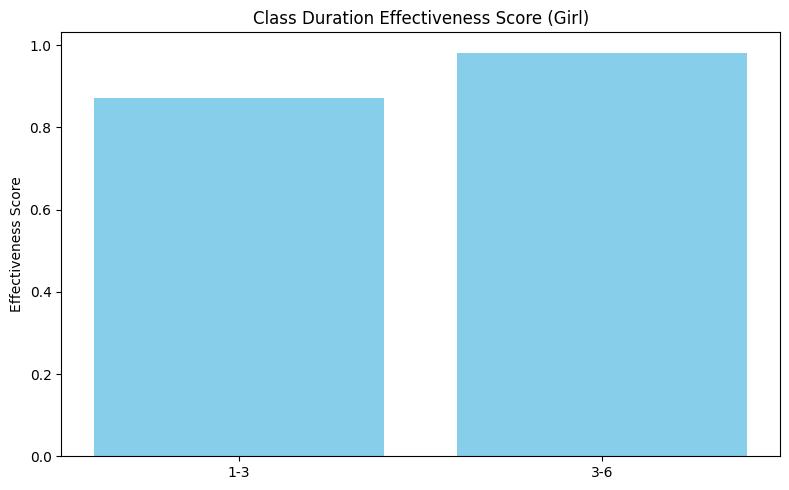

In [63]:
ct_score["Effectiveness Score"] = (
    ct_score["High"] * weights["High"] +
    ct_score["Moderate"] * weights["Moderate"] +
    ct_score["Low"] * weights["Low"]
)

# Label pakai Class Duration saja
ct_score["Group_Duration"] = ct_score["Class Duration"]

# Posisi sumbu X
x = np.arange(len(ct_score))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(x, ct_score["Effectiveness Score"], color="skyblue")

plt.xticks(x, ct_score["Group_Duration"], rotation=0)
plt.ylabel("Effectiveness Score")
plt.title("Class Duration Effectiveness Score (Girl)")
plt.tight_layout()
plt.show()

#### Kesimpulan
Perempuan lebih bisa beradaptasi secara efektif di class duration 3-6 jam perhari

### Location

In [64]:
# Crosstab proporsi
ct = pd.crosstab(
    [df["Location"], df["Class Duration"]],
    df["Adaptivity Level"],
    normalize="index"
)

# Filter hanya untuk Location = No (tidak tinggal di kota)
ct_target = ct.loc["No"]

print(ct_target)


Adaptivity Level      High       Low  Moderate
Class Duration                                
1-3               0.034014  0.564626  0.401361
3-6               0.078947  0.289474  0.631579


In [65]:
ct_percent = (ct_target * 100).round(2)
ct_percent

Adaptivity Level,High,Low,Moderate
Class Duration,,,
1-3,3.40,56.46,40.14
3-6,7.89,28.95,63.16


In [66]:
ct_target = ct_target.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate
0,1-3,0.034014,0.564626,0.401361
1,3-6,0.078947,0.289474,0.631579


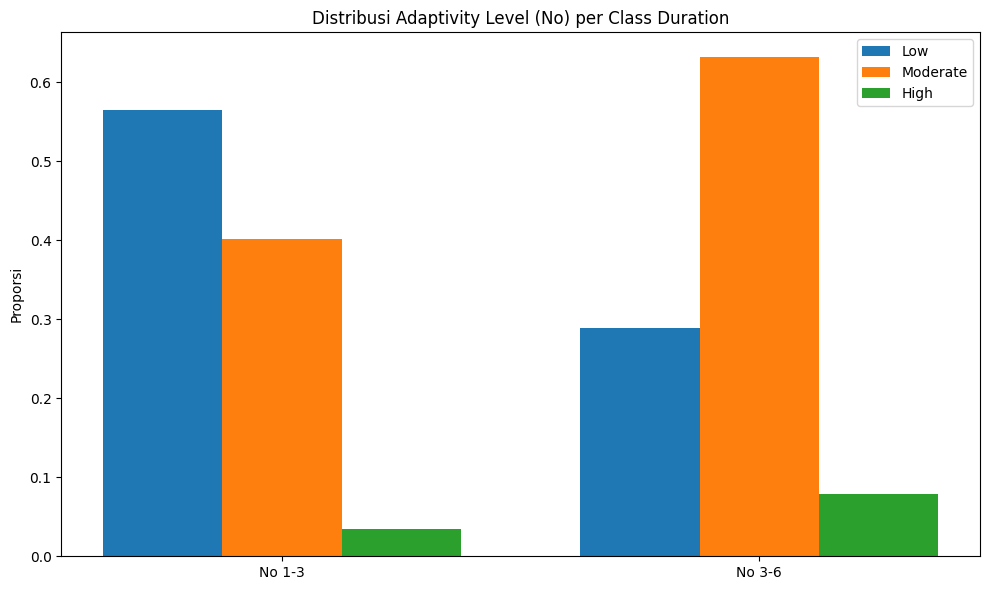

In [67]:
ct_target = ct.loc["No"].reset_index()
ct_target["Group_Duration"] = "No " + ct_target["Class Duration"]

x = np.arange(len(ct_target["Group_Duration"]))  # posisi group
width = 0.25  # lebar tiap bar

fig, ax = plt.subplots(figsize=(10,6))

# Plot Low, Moderate, High berdampingan
ax.bar(x - width, ct_target["Low"], width, label="Low")
ax.bar(x,         ct_target["Moderate"], width, label="Moderate")
ax.bar(x + width, ct_target["High"], width, label="High")

ax.set_xticks(x)
ax.set_xticklabels(ct_target["Group_Duration"], rotation=0)
ax.set_ylabel("Proporsi")
ax.set_title("Distribusi Adaptivity Level (No) per Class Duration")
ax.legend()

plt.tight_layout()
plt.show()

#### Membuat weighted score

In [68]:
weights = {"High": 2, "Moderate": 1, "Low": 0.5}
ct_target["Effectiveness Score"] = (
    ct_target["High"] * weights["High"] +
    ct_target["Moderate"] * weights["Moderate"] +
    ct_target["Low"] * weights["Low"]
)
# ct_score = ct.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate,Group_Duration,Effectiveness Score
0,1-3,0.034014,0.564626,0.401361,No 1-3,0.751701
1,3-6,0.078947,0.289474,0.631579,No 3-6,0.934211


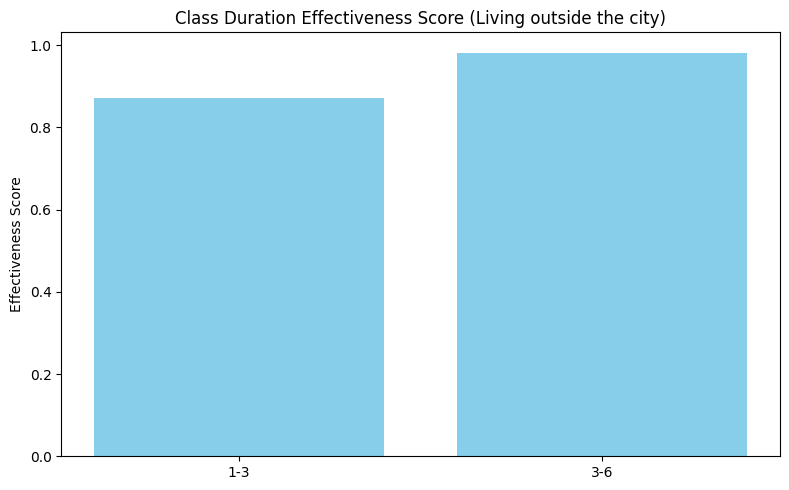

In [69]:
ct_score["Effectiveness Score"] = (
    ct_score["High"] * weights["High"] +
    ct_score["Moderate"] * weights["Moderate"] +
    ct_score["Low"] * weights["Low"]
)

# Label pakai Class Duration saja
ct_score["Group_Duration"] = ct_score["Class Duration"]

# Posisi sumbu X
x = np.arange(len(ct_score))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(x, ct_score["Effectiveness Score"], color="skyblue")

plt.xticks(x, ct_score["Group_Duration"], rotation=0)
plt.ylabel("Effectiveness Score")
plt.title("Class Duration Effectiveness Score (Living outside the city)")
plt.tight_layout()
plt.show()

#### Kesimpulan
Murid yang tinggal diluar kota lebih bisa beradaptasi secara efektif di class duration 3-6 jam perhari

### Financial Condition

In [70]:
# Crosstab proporsi
ct = pd.crosstab(
    [df["Financial Condition"], df["Class Duration"]],
    df["Adaptivity Level"],
    normalize="index"
)

# Filter hanya untuk Financial Condition = Poor
ct_target = ct.loc["Poor"]

print(ct_target)


Adaptivity Level      High       Low  Moderate
Class Duration                                
1-3               0.124294  0.457627  0.418079
3-6               0.000000  0.370370  0.629630


In [71]:
ct_percent = (ct_target * 100).round(2)
ct_percent

Adaptivity Level,High,Low,Moderate
Class Duration,,,
1-3,12.43,45.76,41.81
3-6,0.00,37.04,62.96


In [72]:
ct_target = ct_target.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate
0,1-3,0.124294,0.457627,0.418079
1,3-6,0.000000,0.370370,0.629630


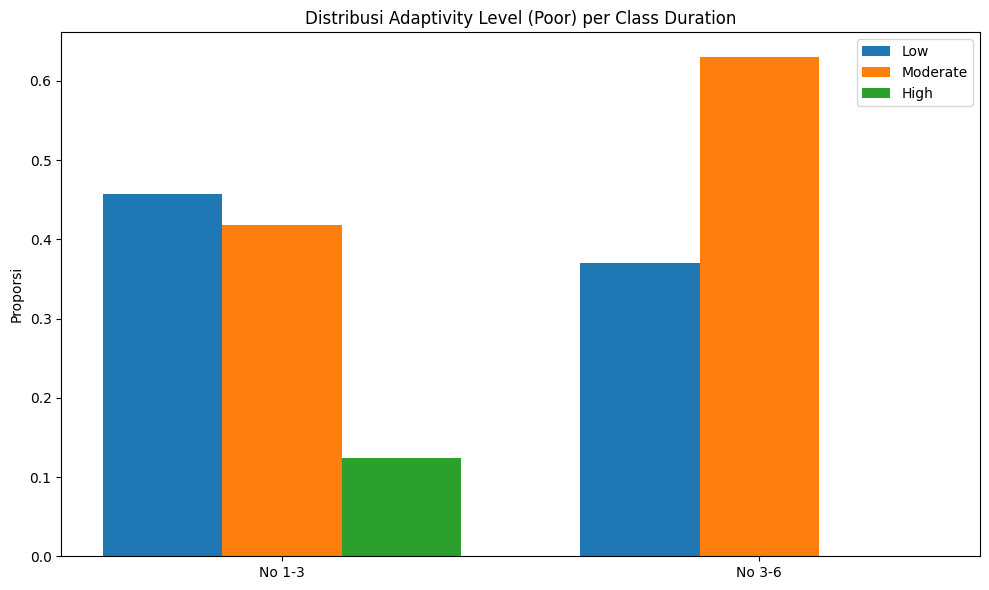

In [73]:
ct_target = ct.loc["Poor"].reset_index()
ct_target["Group_Duration"] = "No " + ct_target["Class Duration"]

x = np.arange(len(ct_target["Group_Duration"]))  # posisi group
width = 0.25  # lebar tiap bar

fig, ax = plt.subplots(figsize=(10,6))

# Plot Low, Moderate, High berdampingan
ax.bar(x - width, ct_target["Low"], width, label="Low")
ax.bar(x,         ct_target["Moderate"], width, label="Moderate")
ax.bar(x + width, ct_target["High"], width, label="High")

ax.set_xticks(x)
ax.set_xticklabels(ct_target["Group_Duration"], rotation=0)
ax.set_ylabel("Proporsi")
ax.set_title("Distribusi Adaptivity Level (Poor) per Class Duration")
ax.legend()

plt.tight_layout()
plt.show()

#### Membuat weighted score

In [74]:
weights = {"High": 2, "Moderate": 1, "Low": 0.5}
ct_target["Effectiveness Score"] = (
    ct_target["High"] * weights["High"] +
    ct_target["Moderate"] * weights["Moderate"] +
    ct_target["Low"] * weights["Low"]
)
# ct_score = ct.reset_index()
ct_target

Adaptivity Level,Class Duration,High,Low,Moderate,Group_Duration,Effectiveness Score
0,1-3,0.124294,0.457627,0.418079,No 1-3,0.895480
1,3-6,0.000000,0.370370,0.629630,No 3-6,0.814815


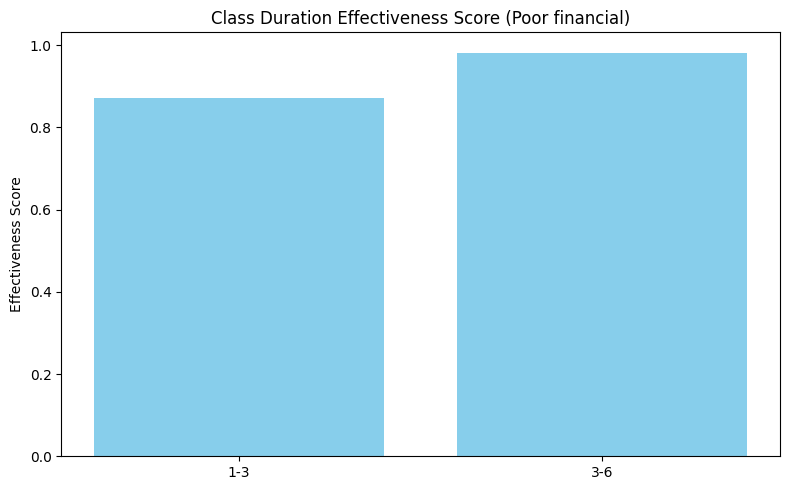

In [75]:
ct_score["Effectiveness Score"] = (
    ct_score["High"] * weights["High"] +
    ct_score["Moderate"] * weights["Moderate"] +
    ct_score["Low"] * weights["Low"]
)

# Label pakai Class Duration saja
ct_score["Group_Duration"] = ct_score["Class Duration"]

# Posisi sumbu X
x = np.arange(len(ct_score))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(x, ct_score["Effectiveness Score"], color="skyblue")

plt.xticks(x, ct_score["Group_Duration"], rotation=0)
plt.ylabel("Effectiveness Score")
plt.title("Class Duration Effectiveness Score (Poor financial)")
plt.tight_layout()
plt.show()

#### Kesimpulan
Murid yang kondisi ekonominya kurang berada lebih bisa beradaptasi secara efektif di class duration 3-6 jam perhari

## Kesimpulan akhir
Dari 5 kategori demografis yang memerlukan perhatian khusus, jam belajar yang ideal untuk meningkatkan efektifvitas adaptasi adalah 3-6 jam per-hari

In [76]:
df.to_excel("student_adaptability.xlsx", index=False)